In [4]:
import numpy as np
from cvxopt import matrix
import cvxopt.solvers as solvers

"""Computamos los pesos del hiperplano"""
def compute_w(multipliers,X,y):
    return sum(multipliers[i] * y[i] * X[i] for i in range(len(y)))

"""Computamos el término independiente"""
def compute_b(w,X,y):
    return sum(y[i] - np.dot(w,X[i]) for i in range(len(X)))/len(X)
    
"""Clase representando el funcionamiento de una SVM lineal"""
class BinaryLinearSVM:

    def __init__(self):
        self.weights = []
        self.b = 0
        self.trained = False
        self.accuracy = -1 #Desconocida
    
    def fit(self, train_data, train_labels):
        #Matriz de Gram
        m = train_data.shape[0]
        K = np.array([np.dot(train_data[i], train_data[j])
                      for i in range(m)
                      for j in range(m)]).reshape((m,m))
        
        aux = np.outer(train_labels,train_labels)*K
        P = matrix(aux, aux.shape, 'd')
        q = matrix(-1 * np.ones(m))
        #Restricciones de igualdad
        A = matrix(train_labels, (1,m), 'd')
        b = matrix(0.0)
        #Restricciones de desigualdad
        G = matrix(np.diag(-1*np.ones(m)))
        h = matrix(np.zeros(m))
        #Resolver el problema
        solvers.options['show_progress'] = False
        solution = solvers.qp(P,q,G,h,A,b)
        #Multiplicadores de Lagrange
        multipliers = np.ravel(solution['x'])
        #Identificamos los vectores de soporte (aquellos con multiplicador positivo) 
        positive_multiplier = multipliers>1e-7
        sv_multipliers = multipliers[positive_multiplier]
        
        support_vectors = train_data[positive_multiplier]
        support_vector_labels = train_labels[positive_multiplier]
        #Computamos w
        self.weights = compute_w(multipliers, train_data, train_labels)
        #Computamos el término independiente b  
        self.b = compute_b(self.weights,support_vectors, support_vector_labels)
        
    def predict(self, x):
        #Computamos el resultado de la operación wx+b y determinamos la posición
        #relativa del punto respecto al hiperplano
        value = np.dot(self.weights,x)+self.b
        if value > 0:
            return 1
        else:
            return -1
        
    def test(self, test_data, test_labels):
        #Probamos las predicciones y devolvemos la precisión
        results = [self.predict(test_data[i]) for i in range(len(test_data))]
        count = sum(1 for i in range(len(test_data)) if test_labels[i]==results[i])
        self.accuracy = 100*(count/len(test_data))

In [5]:
svm = BinaryLinearSVM()
trainingData = np.array([[-1,1],[1,1],[-1,-1],[1,-1], [1,0], [-7,0]])
trainingLabels = np.array([1,1,-1,-1, 1, 1])
svm.fit(trainingData, trainingLabels)
print("Pesos: ", svm.weights)
print("Termino indep: ", svm.b)

Pesos:  [-1.78443811e-08  2.00000007e+00]
Termino indep:  1.0000000059516643


In [6]:
print("Case 1: ", svm.predict([7,24]))
print("Case 2: ", svm.predict([3,2]))
print("Case 3: ", svm.predict([29,-250]))

Case 1:  1
Case 2:  1
Case 3:  -1


In [7]:
%%latex
Hagamos una prueba con los siguientes datos

$$X = \{(1,0), (10,10), (-5,-5), (3,-1), (34, -5), (25, 2), (-17, -5), (7, 6) \}$$

$$Y = \{1, 1, -1, -1, -1, 1, -1, 1 \}$$

<IPython.core.display.Latex object>

In [8]:
X = np.array([[1,0],[10,10],[-5,-5],[3,-1], [34, -5], [25,2], [-17,-5], [7,6]])
Y = np.array([1,1,-1,-1, -1, 1, -1, 1])
svm.test(X,Y)
print("Accuracy: ", svm.accuracy, "%")

Accuracy:  100.0 %


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [10]:
def getColor(index, labels):
    if labels[index] == 1:
        return 'b'
    else:
        return 'r'

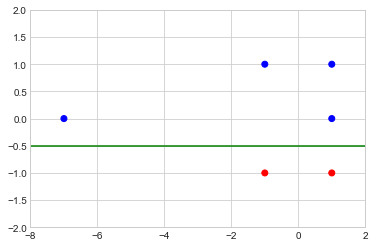

In [11]:
#Datos originales
x = np.linspace(-8, 2, 100)
y = np.linspace(-2, 2, 100)
xAux, yAux = np.meshgrid(x,y)
F = xAux*svm.weights[0]+yAux*svm.weights[1]+svm.b

c1 = [trainingData[i][0] for i in range(len(trainingData))]
c2 = [trainingData[i][1] for i in range(len(trainingData))]
color = [getColor(i,trainingLabels) for i in range(len(trainingData))]
plt.scatter(c1,c2, c=color)
plt.contour(xAux,yAux,F, [0], colors='g')

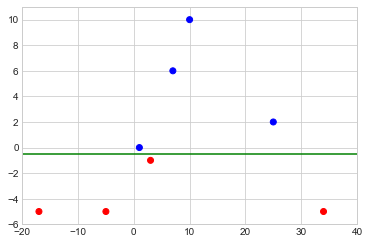

In [12]:
#Datos de prueba
x = np.linspace(-20, 40, 100)
y = np.linspace(-6, 11, 100)
xAux, yAux = np.meshgrid(x,y)
F = xAux*svm.weights[0]+yAux*svm.weights[1]+svm.b

c1 = [X[i][0] for i in range(len(X))]
c2 = [X[i][1] for i in range(len(X))]
color = [getColor(i,Y) for i in range(len(X))]
plt.scatter(c1 , c2, c=color)
plt.contour(xAux,yAux,F,[0], colors='g')

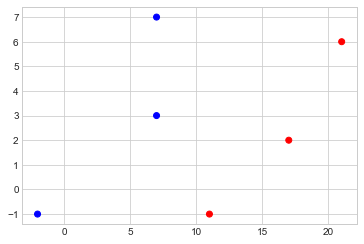

In [13]:
#Otro set de entrenamiento
X = np.array([[7, 3],[-2,-1],[7, 7],[11,-1],[17, 2],[21,6]])
Y = np.array([1,1,1,-1,-1,-1])

c1 = [X[i][0] for i in range(len(X))]
c2 = [X[i][1] for i in range(len(X))]
color = [getColor(i,Y) for i in range(len(X))]
plt.scatter(c1 , c2, c=color)

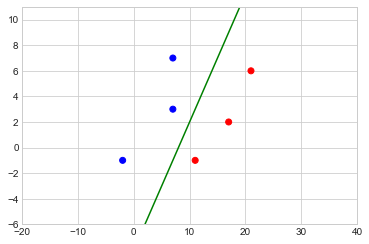

In [14]:
svm.fit(X,Y)
x = np.linspace(-20, 40, 100)
y = np.linspace(-6, 11, 100)
xAux, yAux = np.meshgrid(x,y)
F = xAux*svm.weights[0]+yAux*svm.weights[1]+svm.b
plt.scatter(c1 , c2, c=color)
plt.contour(xAux,yAux,F,[0], colors='g')

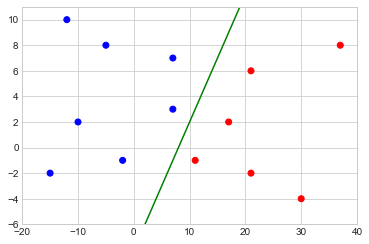

In [16]:
X = np.array([[-10,2],[-15,-2],[-5,8],[-12,10],[7, 3],[-2,-1],[7, 7],[11,-1],[17, 2],[21,6],[30,-4],[21,-2],[37,8]])
Y = np.array([1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1])
c1 = [X[i][0] for i in range(len(X))]
c2 = [X[i][1] for i in range(len(X))]
color = [getColor(i,Y) for i in range(len(X))]

svm.fit(X,Y)
x = np.linspace(-20, 40, 100)
y = np.linspace(-6, 11, 100)
xAux, yAux = np.meshgrid(x,y)
F = xAux*svm.weights[0]+yAux*svm.weights[1]+svm.b
plt.scatter(c1 , c2, c=color)
plt.contour(xAux,yAux,F,[0], colors='g')